https://zindi.africa/competitions/xente-fraud-detection-challenge/data

Xente is an e-commerce and financial service app serving 10,000+ customers in Uganda.

This dataset includes a sample of approximately 140,000 transactions that occurred between 15 November 2018 and 15 March 2019.


# **1. Exploring Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Feautures defenition
feautures = pd.read_csv('/content/drive/MyDrive/Tech4Dev/Databases/5. Machine Learning (ML)/Xente_Variable_Definitions.csv')
feautures

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


In [ ]:
for x in range (16):
  print(feautures.Definition.iloc[x])

Unique �transaction identifier on platform
Unique number assigned to a batch of transactions for processing
Unique number identifying the customer on platform
Unique number identifying the customer subscription
Unique identifier attached to Account
Country currency
Numerical geographical code of country
Source provider of Item �bought.
Item name being bought.
ProductIds are organized into these broader product categories.
Identifies if customer used web,Android, IOS, pay later or checkout.
Value of the transaction. Positive for debits from customer account and negative for credit into customer account
Absolute value of the amount
Transaction start time
Category of Xente's pricing structure for merchants
Fraud status of transaction 1 -yes or 0-No


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tech4Dev/Databases/5. Machine Learning (ML)/ xente_training.csv', parse_dates=['TransactionStartTime'])
df_test = pd.read_csv('/content/drive/MyDrive/Tech4Dev/Databases/5. Machine Learning (ML)/xente_test.csv', parse_dates=['TransactionStartTime'])

df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  object             
 11  Amount                95662 non-null  float64            
 12  Valu

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45019 entries, 0 to 45018
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         45019 non-null  object             
 1   BatchId               45019 non-null  object             
 2   AccountId             45019 non-null  object             
 3   SubscriptionId        45019 non-null  object             
 4   CustomerId            45019 non-null  object             
 5   CurrencyCode          45019 non-null  object             
 6   CountryCode           45019 non-null  int64              
 7   ProviderId            45019 non-null  object             
 8   ProductId             45019 non-null  object             
 9   ProductCategory       45019 non-null  object             
 10  ChannelId             45019 non-null  object             
 11  Amount                45019 non-null  float64            
 12  Valu

In [ ]:
#extract the year 

df['Year'] = df['TransactionStartTime'].dt.year
df_test['Year'] = df_test['TransactionStartTime'].dt.year

In [ ]:
#extract the month 

df['Month'] = df['TransactionStartTime'].dt.month
df_test['Month'] = df_test['TransactionStartTime'].dt.month

In [ ]:
#extract the day

df['Day'] = df['TransactionStartTime'].dt.day
df_test['Day'] = df_test['TransactionStartTime'].dt.day

In [ ]:
#extract the hour

df['Hour'] = df['TransactionStartTime'].dt.hour
df_test['Hour'] = df_test['TransactionStartTime'].dt.hour

In [ ]:
df['Day_time'] = ['Early Morning' if 4 < i <= 8
                  else 'Morning' if 8 < i <= 12
                  else 'Noon' if 12 < i <= 16
                  else 'Evening' if 16 < i <= 20
                  else 'Night' if 20 < i <= 24
                  else 'Late Night'
                  for i in df.Hour]

  
  
df_test['Day_time'] = ['Early Morning' if 4 < i <= 8
                  else 'Morning' if 8 < i <= 12
                  else 'Noon' if 12 < i <= 16
                  else 'Evening' if 16 < i <= 20
                  else 'Night' if 20 < i <= 24
                  else 'Late Night'
                  for i in df_test.Hour]

df.sample(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Year,Month,Day,Hour,Day_time
81569,TransactionId_85285,BatchId_55083,AccountId_4841,SubscriptionId_3829,CustomerId_5260,UGX,256,ProviderId_4,ProductId_6,financial_services,...,-5000.0,5000,2019-02-01 14:02:06+00:00,2,0,2019,2,1,14,Noon
26553,TransactionId_42983,BatchId_112596,AccountId_3273,SubscriptionId_2835,CustomerId_3701,UGX,256,ProviderId_5,ProductId_15,financial_services,...,500.0,500,2018-12-14 11:11:28+00:00,2,0,2018,12,14,11,Morning
24729,TransactionId_132887,BatchId_37891,AccountId_2583,SubscriptionId_233,CustomerId_3000,UGX,256,ProviderId_6,ProductId_3,airtime,...,1000.0,1000,2018-12-13 08:10:23+00:00,2,0,2018,12,13,8,Early Morning
60651,TransactionId_45908,BatchId_35886,AccountId_2591,SubscriptionId_4186,CustomerId_3008,UGX,256,ProviderId_6,ProductId_10,airtime,...,1000.0,1000,2019-01-15 07:17:24+00:00,2,0,2019,1,15,7,Early Morning
69738,TransactionId_9217,BatchId_15951,AccountId_571,SubscriptionId_873,CustomerId_908,UGX,256,ProviderId_5,ProductId_15,financial_services,...,1900.0,1900,2019-01-24 07:41:32+00:00,2,0,2019,1,24,7,Early Morning
65338,TransactionId_92304,BatchId_119746,AccountId_4841,SubscriptionId_3829,CustomerId_4429,UGX,256,ProviderId_4,ProductId_6,financial_services,...,-100.0,100,2019-01-19 07:53:43+00:00,2,0,2019,1,19,7,Early Morning
87988,TransactionId_73813,BatchId_79254,AccountId_4841,SubscriptionId_3829,CustomerId_4827,UGX,256,ProviderId_4,ProductId_6,financial_services,...,-50.0,50,2019-02-07 15:41:18+00:00,2,0,2019,2,7,15,Noon
66794,TransactionId_62332,BatchId_53743,AccountId_1686,SubscriptionId_3389,CustomerId_2068,UGX,256,ProviderId_6,ProductId_3,airtime,...,1000.0,1000,2019-01-21 08:41:28+00:00,2,0,2019,1,21,8,Early Morning
52416,TransactionId_133458,BatchId_37860,AccountId_2819,SubscriptionId_2831,CustomerId_3241,UGX,256,ProviderId_6,ProductId_3,airtime,...,2000.0,2000,2019-01-07 20:19:13+00:00,2,0,2019,1,7,20,Evening
47428,TransactionId_133524,BatchId_16552,AccountId_3768,SubscriptionId_1591,CustomerId_4211,UGX,256,ProviderId_5,ProductId_3,airtime,...,5000.0,5000,2018-12-31 07:23:24+00:00,4,0,2018,12,31,7,Early Morning


In [ ]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult,Year,Month,Day,Hour
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018,2018.497115,6.566233,15.902898,12.447722
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872,0.499994,5.224310,8.962822,4.846964
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000,2018.000000,1.000000,1.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000,2018.000000,1.000000,8.000000,8.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000,2018.000000,11.000000,16.000000,13.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000,2019.000000,12.000000,24.000000,17.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000,2019.000000,12.000000,31.000000,23.000000


In [ ]:
df.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
Year                    0
Month                   0
Day                     0
Hour                    0
Day_time                0
dtype: int64

In [ ]:
df_test.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
Year                    0
Month                   0
Day                     0
Hour                    0
Day_time                0
dtype: int64

In [ ]:
# No null values

In [ ]:
df_test.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'Year', 'Month', 'Day',
       'Hour', 'Day_time'],
      dtype='object')

In [ ]:
# Check Cardinality

unique_dic = []

for col in df_test.columns:

  unique_num_train = len(df[col].unique())
  unique_num_test = len(df_test[col].unique())
  unique_dic.append({'Total_Unique_Train' : unique_num_train,
                     'Cardinality%_Train': (unique_num_train/95662)*100,
                     'Total_Unique_Test' : unique_num_test,
                     'Cardinality%_Test': (unique_num_test/45019)*100})


unique_df = pd.DataFrame(unique_dic, index = df_test.columns).sort_values(by = 'Cardinality%_Train', ascending = False)
unique_df

,Total_Unique_Train,Cardinality%_Train,Total_Unique_Test,Cardinality%_Test
TransactionId,95662,100.000000,45019,100.000000
BatchId,94809,99.108319,44684,99.255870
TransactionStartTime,94556,98.843846,44018,97.776494
CustomerId,3742,3.911689,5018,11.146405
AccountId,3633,3.797746,2471,5.488794
SubscriptionId,3627,3.791474,2470,5.486572
Amount,1676,1.752002,998,2.216842
Value,1517,1.585792,944,2.096892
Day,31,0.032406,28,0.062196
Hour,24,0.025088,24,0.053311


In [ ]:
df.ChannelId.value_counts()

ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: ChannelId, dtype: int64

In [ ]:
df_test.ChannelId.value_counts()

ChannelId_3    38090
ChannelId_2     6198
ChannelId_5      602
ChannelId_1      102
ChannelId_4       27
Name: ChannelId, dtype: int64

## **- Notes on the features to be used:**

**1. TransactionId:** Unique transaction identifier on platform, shows **high cardinality**, *won't be used*.

**2. BatchId:**	Unique number assigned to a batch of transactions for processing, shows **high cardinality**, *won't be used*.

**3. AccountId:**	Unique number identifying the customer on platform, shows **high cardinality**, *won't be used*.

**4. SubscriptionId:**	Unique number identifying the customer subscription, shows **high cardinality**, *won't be used*.

**5. CustomerId:** Unique identifier attached to Account.

  - Although it shows high cardinality, but it's low (3742) compared with the total datset (95662).
  - we think that customer Id is** important as a feature** as customers behavior differ.
  - But using **dummies is not appropriate** cause the number of unique values differ from the test dataset (5018) resulting in an error when predicting the test dataset.
  - the second option is to convert it into numerical values but this won't be also appropriate cause IDs is not a quantitative data, it's a **nominal data**, 
  - So *won't be used* too.

**6. CurrencyCode:**	Country currency, only **one unique value** in the whole data set so *won't be used*.

**7. CountryCode:**	Numerical geographical code of country, only **one unique value** in the whole data set so *won't be used*.

**8. ProviderId:**	Source provider of Item bought, this is of **no benefit** in Fraud detection, so *won't be used*.

**9. ProductId:** Item name being bought. 
  - We can see that **unique values** in our dataframe and the test datarame are **different**.
  - so getting **dummies** resulted in an **error**.
  - Thus we will use the *product category instead*.

**10. ProductCategory:**	ProductIds are organized into these broader product categories, **will be used in our model**.

**11. ChannelId:**	Identifies if customer used web,Android, IOS, pay later or checkout. 
  - We can see that **unique values** in our dataframe and the test datarame are **different** (4 Vs 5).
  - So getting **dummies** resulted in an **error**.
  - But this feature is **important**, so we **will use it as numerical** (from 1 to 5).

**12. Amount:**	Value of the transaction. Positive for debits from customer account and negative for credit into customer account. 
  - We will make a new column with **binary categories** either (debit or credit) based on the sign of the amount instead of using the amount feature.
  - we will use the 'value' feature instead.

**13. Value:**	Absolute value of the amount, **will be used in our model**.

**14. TransactionStartTime:**	Transaction start time which is specific for each transaction.
- Although the time between every transaction is **importatnt** but we can't use this feature that shows **very high cardianlity**.
- we will **extract** day, month, year.
- In *Future plans* we could extract the **time elapsed** between transactions per each customer.

**15. PricingStrategy:**	Category of Xente's pricing structure for merchants.
  - Although it's a numerical data but we will **get dummies** as this is mainly categorical.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  object             
 11  Amount                95662 non-null  float64            
 12  Valu

In [ ]:
df.ProductCategory.value_counts()

financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: ProductCategory, dtype: int64

In [ ]:
# Creating new column for type of transaction either debit or credit
# Make sure that there is no datapoints where amount == 0

df[df.Amount ==0 ]

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Year,Month,Day,Hour,Day_time


In [ ]:
# pd.set_option('display.max_rows',None)

In [ ]:
df.sample(200)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Year,Month,Day,Hour,Day_time
4904,TransactionId_95866,BatchId_71438,AccountId_4841,SubscriptionId_3829,CustomerId_1564,UGX,256,ProviderId_4,ProductId_6,financial_services,...,-100.0,100,2018-11-21 08:05:26+00:00,2,0,2018,11,21,8,Early Morning
63427,TransactionId_130864,BatchId_101807,AccountId_4841,SubscriptionId_3829,CustomerId_3092,UGX,256,ProviderId_4,ProductId_6,financial_services,...,-5000.0,5000,2019-01-18 10:05:13+00:00,2,0,2019,1,18,10,Morning
86769,TransactionId_108431,BatchId_74645,AccountId_4841,SubscriptionId_3829,CustomerId_2574,UGX,256,ProviderId_4,ProductId_6,financial_services,...,-622.0,622,2019-02-06 07:43:44+00:00,2,0,2019,2,6,7,Early Morning
65466,TransactionId_71755,BatchId_74102,AccountId_10,SubscriptionId_4346,CustomerId_3204,UGX,256,ProviderId_4,ProductId_4,airtime,...,-5000.0,5000,2019-01-19 11:54:53+00:00,4,0,2019,1,19,11,Morning
29634,TransactionId_126237,BatchId_81399,AccountId_4421,SubscriptionId_4038,CustomerId_4878,UGX,256,ProviderId_5,ProductId_15,financial_services,...,50000.0,50000,2018-12-16 16:17:25+00:00,2,0,2018,12,16,16,Noon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36398,TransactionId_92729,BatchId_116783,AccountId_4841,SubscriptionId_3829,CustomerId_814,UGX,256,ProviderId_4,ProductId_6,financial_services,...,-5000.0,5000,2018-12-21 19:34:24+00:00,2,0,2018,12,21,19,Evening
93565,TransactionId_137628,BatchId_105962,AccountId_4841,SubscriptionId_3829,CustomerId_5040,UGX,256,ProviderId_4,ProductId_6,financial_services,...,-500.0,500,2019-02-11 12:45:27+00:00,2,0,2019,2,11,12,Morning
27626,TransactionId_48489,BatchId_108343,AccountId_3384,SubscriptionId_634,CustomerId_3818,UGX,256,ProviderId_6,ProductId_11,data_bundles,...,500.0,500,2018-12-14 18:59:26+00:00,2,0,2018,12,14,18,Evening
12826,TransactionId_59852,BatchId_57337,AccountId_3507,SubscriptionId_2644,CustomerId_3944,UGX,256,ProviderId_6,ProductId_3,airtime,...,2000.0,2000,2018-12-01 13:53:35+00:00,2,0,2018,12,1,13,Noon


In [ ]:
# Creating new column for type of transaction either debit or credit

def transaction_type(val):
    if val < 0 :
        return'Credit'
    elif val > 0 : 
        return'Debit'


df['transaction'] = df['Amount'].map(transaction_type)
df_test['transaction'] = df_test['Amount'].map(transaction_type)

df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Value,TransactionStartTime,PricingStrategy,FraudResult,Year,Month,Day,Hour,Day_time,transaction
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,1000,2018-11-15 02:18:49+00:00,2,0,2018,11,15,2,Late Night,Debit
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,20,2018-11-15 02:19:08+00:00,2,0,2018,11,15,2,Late Night,Credit
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,500,2018-11-15 02:44:21+00:00,2,0,2018,11,15,2,Late Night,Debit
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,21800,2018-11-15 03:32:55+00:00,2,0,2018,11,15,3,Late Night,Debit
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,644,2018-11-15 03:34:21+00:00,2,0,2018,11,15,3,Late Night,Credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,...,1000,2019-02-13 09:54:09+00:00,2,0,2019,2,13,9,Morning,Credit
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,...,1000,2019-02-13 09:54:25+00:00,2,0,2019,2,13,9,Morning,Debit
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,...,20,2019-02-13 09:54:35+00:00,2,0,2019,2,13,9,Morning,Credit
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,...,3000,2019-02-13 10:01:10+00:00,2,0,2019,2,13,10,Morning,Debit


In [ ]:
# When get dummies for channel_id, we could see that the test dataset contains more unique values (5 vs 4), so we faced an error
# ValueError: X has 24 features, but LogisticRegression is expecting 23 features as input.
# That's why will change it into numbers

channel_id_new = df["ChannelId"].str.split("_", n = 1, expand = True)

df["ChannelId"]= channel_id_new[1].astype(int)

df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Value,TransactionStartTime,PricingStrategy,FraudResult,Year,Month,Day,Hour,Day_time,transaction
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,1000,2018-11-15 02:18:49+00:00,2,0,2018,11,15,2,Late Night,Debit
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,20,2018-11-15 02:19:08+00:00,2,0,2018,11,15,2,Late Night,Credit
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,500,2018-11-15 02:44:21+00:00,2,0,2018,11,15,2,Late Night,Debit
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,21800,2018-11-15 03:32:55+00:00,2,0,2018,11,15,3,Late Night,Debit
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,644,2018-11-15 03:34:21+00:00,2,0,2018,11,15,3,Late Night,Credit


In [ ]:
channel_id_new = df_test["ChannelId"].str.split("_", n = 1, expand = True)

df_test["ChannelId"]= channel_id_new[1].astype(int)

df_test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Amount,Value,TransactionStartTime,PricingStrategy,Year,Month,Day,Hour,Day_time,transaction
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,...,1000.0,1000,2019-02-13 10:01:40+00:00,4,2019,2,13,10,Morning,Debit
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,...,2000.0,2000,2019-02-13 10:02:12+00:00,2,2019,2,13,10,Morning,Debit
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,...,-50.0,50,2019-02-13 10:02:30+00:00,2,2019,2,13,10,Morning,Credit
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,...,3000.0,3000,2019-02-13 10:02:38+00:00,4,2019,2,13,10,Morning,Debit
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,...,-60.0,60,2019-02-13 10:02:58+00:00,2,2019,2,13,10,Morning,Credit


# **2. Preprocessing**

In [ ]:
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult', 'Year',
       'Month', 'Day', 'Hour', 'Day_time', 'transaction'],
      dtype='object')

In [ ]:
X = df[['CustomerId', 'ProductCategory', 'ChannelId', 'Value', 'PricingStrategy', 'transaction', 'Year', 'Month', 'Day', 'Day_time']]
y = df['FraudResult']

In [ ]:
#split into test and train data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 1)



In [ ]:
#check the shapeof our split 

X_train.shape, X_test.shape

((76529, 10), (19133, 10))

In [ ]:
X_train.dtypes

CustomerId         object
ProductCategory    object
ChannelId           int64
Value               int64
PricingStrategy     int64
transaction        object
Year                int64
Month               int64
Day                 int64
Day_time           object
dtype: object

In [ ]:
categorical = [col for col in X_train.columns if X_train[col].dtypes =='O']

In [ ]:
categorical

['CustomerId', 'ProductCategory', 'transaction', 'Day_time']

In [ ]:
numerical = [col for col in X_train.columns if X_train[col].dtypes !='O']
numerical

['ChannelId', 'Value', 'PricingStrategy', 'Year', 'Month', 'Day']

In [ ]:
# we will drop 'PricingStrategy' from numerical list as we will deal with it as a categorical feature.

numerical.remove('PricingStrategy')
numerical

['ChannelId', 'Value', 'Year', 'Month', 'Day']

In [ ]:
# Get dummies for categorical features
X_train = pd.concat([X_train[numerical], 
                    pd.get_dummies(X_train.ProductCategory, drop_first=True), 
                    pd.get_dummies(X_train.PricingStrategy, drop_first=True),
                    pd.get_dummies(X_train.transaction, drop_first=True),
                    pd.get_dummies(X_train.Day_time, drop_first=True)], 
                    axis =1)

In [ ]:
X_train

,ChannelId,Value,Year,Month,Day,data_bundles,financial_services,movies,other,ticket,...,utility_bill,1,2,4,Debit,Evening,Late Night,Morning,Night,Noon
82383,3,12000,2019,2,1,0,1,0,0,0,...,0,0,1,0,1,1,0,0,0,0
76189,3,500,2019,1,28,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
85148,2,50,2019,2,4,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2041,2,10,2018,11,16,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
6794,3,10000,2018,11,23,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,2,622,2018,12,9,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
73349,2,5000,2019,1,25,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
50057,2,100,2019,1,3,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5192,2,50,2018,11,21,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
# Get dummies for categorical features
X_test = pd.concat([X_test[numerical], 
                    pd.get_dummies(X_test.ProductCategory, drop_first=True), 
                    pd.get_dummies(X_test.PricingStrategy, drop_first=True), 
                    pd.get_dummies(X_test.transaction, drop_first=True),
                    pd.get_dummies(X_test.Day_time, drop_first=True)], 
                   axis =1)

In [ ]:
X_test

,ChannelId,Value,Year,Month,Day,data_bundles,financial_services,movies,other,ticket,...,utility_bill,1,2,4,Debit,Evening,Late Night,Morning,Night,Noon
65139,2,100,2019,1,18,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
60522,3,2000,2019,1,14,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
32876,3,2000,2018,12,19,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
79640,2,50,2019,1,31,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
34324,2,5000,2018,12,21,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78211,3,10000,2019,1,30,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
59856,3,1000,2019,1,14,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
14698,3,3500,2018,12,4,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
52329,3,1000,2019,1,7,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0


In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/
# Oversampling to overcome imbalance

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (152750, 22)
After OverSampling, the shape of train_y: (152750,) 

After OverSampling, counts of label '1': 76375
After OverSampling, counts of label '0': 76375


# **4. Logistic Regression Model**

## i. Model Training

In [ ]:
#Model training 

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train_res, y_train_res.ravel())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
#test data
y_pred_test = logreg.predict(X_test.values)

In [ ]:
# probability of getting zero for each data point, i.e , no fraud
logreg.predict_proba(X_test.values)[:,0]

array([0.97436482, 0.97225998, 0.97221514, ..., 0.97042901, 0.97338527,
       0.97334669])

In [ ]:
#probability of getting 1, i.e , fraud
logreg.predict_proba(X_test.values)[:,1]

array([0.02563518, 0.02774002, 0.02778486, ..., 0.02957099, 0.02661473,
       0.02665331])

## ii. Metrics

In [ ]:
# model accuracy metrics for logistic regression


print('Training set score: ', logreg.score(X_train.values, y_train.values))

print('Test set score: ', logreg.score(X_test.values, y_test.values))

Training set score:  0.9917416926916593
Test set score:  0.9913238906601161


In [ ]:
#check null accuracy 
y_test.value_counts()

0    19094
1       39
Name: FraudResult, dtype: int64

In [ ]:
#check null accuracy 
# our dataset is highly imbalanced, null accuracy is almost the same as our accuracy

null_acuracy = y_test.value_counts()[0]/(len(y_test))
null_acuracy

0.9979616369623164

In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred_test)

In [ ]:
cm

array([[18929,   165],
       [    1,    38]])

In [ ]:
print('True positives (TP) = ', cm[0,0])
print('False positives (FP)= ', cm[0, 1])
print('False Negatives (FN)= ', cm[1, 0])
print('True Negatives (TN))= ', cm[1, 1])

True positives (TP) =  18929
False positives (FP)=  165
False Negatives (FN)=  1
True Negatives (TN))=  38


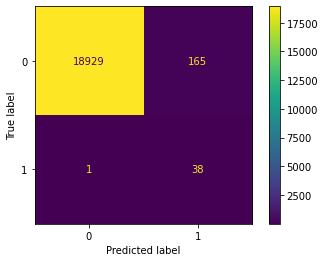

In [ ]:
#visualze with heatmap

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

disp.plot();

In [ ]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     19094
           1       0.19      0.97      0.31        39

    accuracy                           0.99     19133
   macro avg       0.59      0.98      0.65     19133
weighted avg       1.00      0.99      0.99     19133



In [ ]:
#probability of getting 1, i.e , Fraud
#probability of getting 0, i.e , no Fraud

y_pred1 = logreg.predict_proba(X_test.values)[:,1]
y_pred0 = logreg.predict_proba(X_test.values)[:,0]

In [ ]:
# Plot ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label=1)

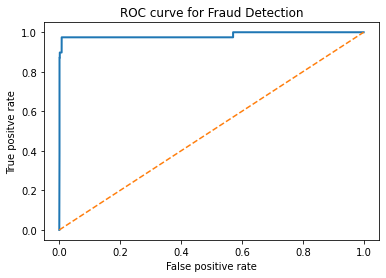

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], '--')
plt.title('ROC curve for Fraud Detection')
plt.xlabel('False positive rate')
plt.ylabel('True positve rate')
plt.show()



In [ ]:
#computing AUC 

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print(ROC_AUC)

0.9842090279400428


Best Threshold=0.650802, G-Mean=0.983


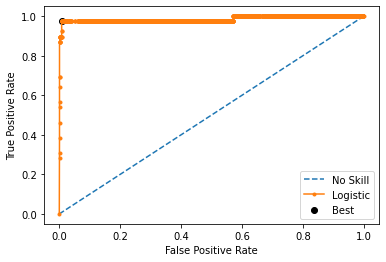

In [ ]:
# Determine the best the optimal threshold
from numpy import sqrt
from numpy import argmax
from matplotlib import pyplot


# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()

# show the plot
pyplot.show()

# Random Forest

In [ ]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train_res, y_train_res.ravel())


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier()

In [ ]:
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train_res)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


## **ii. Validation Metrics**

### **a. Accuracy**

In [ ]:
#check for accuracy 

from sklearn.metrics import accuracy_score

print('Model accuracy score(test): ', accuracy_score(y_test, y_pred_test))
print('Model accuracy score(train): ', accuracy_score( y_train_res.ravel(), y_pred_train))

Model accuracy score(test):  0.9990069513406157
Model accuracy score(train):  0.9999148936170212


### **b. Null Accuracy**

In [ ]:
y_test.value_counts()

0    19094
1       39
Name: FraudResult, dtype: int64

In [ ]:
null_acuracy = y_test.value_counts()[0]/(len(y_test))
null_acuracy

0.9979616369623164

In [ ]:
# null accuracy is less than our actual accuracy, hence, our model is not just predicting 
# the most frequent value

### **c. Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred_test)

In [ ]:
print('True Negatives (TN) = ', cm[0,0])
print('False positives (FP)= ', cm[0, 1])
print('False Negatives (FN)= ', cm[1, 0])
print('True Positives (TP))= ', cm[1, 1])

True Negatives (TN) =  19080
False positives (FP)=  14
False Negatives (FN)=  5
True Positives (TP))=  34


In [ ]:
# Visualze with heatmap
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

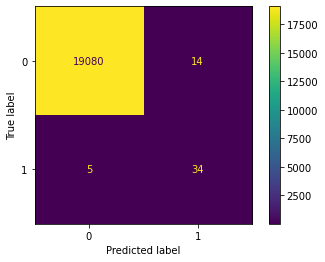

In [ ]:
disp.plot();

### **d. Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19094
           1       0.71      0.87      0.78        39

    accuracy                           1.00     19133
   macro avg       0.85      0.94      0.89     19133
weighted avg       1.00      1.00      1.00     19133



### **e. ROC, AUC**

In [ ]:
#probability of getting 0, i.e , Death
#probability of getting 1, i.e , Recovery

y_pred0 = logreg.predict_proba(X_test)[:,0]
y_pred1 = logreg.predict_proba(X_test)[:,1]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label=1)

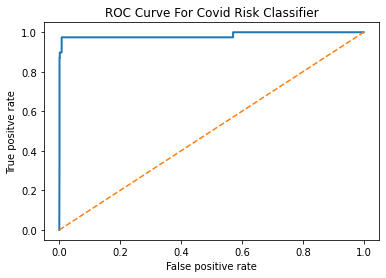

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], '--')
plt.title('ROC Curve For Covid Risk Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positve rate')
plt.show()



In [ ]:
#computing AUC 

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print(ROC_AUC)

0.9842090279400428


#**5. Prediction of df_test**


In [ ]:
df_test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Amount,Value,TransactionStartTime,PricingStrategy,Year,Month,Day,Hour,Day_time,transaction
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,...,1000.0,1000,2019-02-13 10:01:40+00:00,4,2019,2,13,10,Morning,Debit
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,...,2000.0,2000,2019-02-13 10:02:12+00:00,2,2019,2,13,10,Morning,Debit
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,...,-50.0,50,2019-02-13 10:02:30+00:00,2,2019,2,13,10,Morning,Credit
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,...,3000.0,3000,2019-02-13 10:02:38+00:00,4,2019,2,13,10,Morning,Debit
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,...,-60.0,60,2019-02-13 10:02:58+00:00,2,2019,2,13,10,Morning,Credit


In [ ]:
df_test.shape

(45019, 21)

In [ ]:
X_df_test = df_test[['CustomerId', 'ProductCategory', 'ChannelId', 'Value', 'PricingStrategy', 'transaction', 'Year', 'Month', 'Day', 'Day_time']]


X_df_test = pd.concat([X_df_test[['ChannelId','Value', 'Year', 'Month', 'Day']], 
                    pd.get_dummies(X_df_test.ProductCategory, drop_first=True), 
                    pd.get_dummies(X_df_test.PricingStrategy, drop_first=True),
                    pd.get_dummies(X_df_test.transaction, drop_first=True),
                    pd.get_dummies(X_df_test.Day_time, drop_first=True)], 
                    axis =1)

In [ ]:
#test data
y_df_test = clf.predict(X_df_test.values)
y_df_test

array([0, 0, 0, ..., 0, 0, 0])

## **Prediction Results**

In [ ]:
# Prediction results
new_df_test = pd.DataFrame(clf.predict(X_df_test.values), index = df_test['TransactionId'])
new_df_test.rename(columns = {0:'FraudResult'}, inplace = True)

new_df_test.sample(10)




,FraudResult
TransactionId,
TransactionId_33370,0
TransactionId_77572,0
TransactionId_37251,0
TransactionId_91554,0
TransactionId_126260,0
TransactionId_79826,0
TransactionId_14887,0
TransactionId_102630,0
TransactionId_27072,0


In [ ]:
new_df_test.value_counts()

FraudResult
0              44943
1                 76
dtype: int64

In [ ]:
predictions = logreg.predict(X_df_test.values)

submission = pd.DataFrame({'TransactionId': df_test['TransactionId'], 'FraudResult': predictions})

submission.sample(10)

,TransactionId,FraudResult
10266,TransactionId_135917,0
31816,TransactionId_90510,0
2125,TransactionId_19340,0
3680,TransactionId_88462,0
15379,TransactionId_51091,0
22017,TransactionId_118443,0
14830,TransactionId_90202,0
41684,TransactionId_98526,0
20604,TransactionId_21593,0
22728,TransactionId_102878,0


In [ ]:
submission.value_counts()

TransactionId        FraudResult
TransactionId_10     0              1
TransactionId_57583  0              1
TransactionId_57557  0              1
TransactionId_5756   0              1
TransactionId_57570  0              1
                                   ..
TransactionId_15630  0              1
TransactionId_15634  0              1
TransactionId_15643  0              1
TransactionId_15644  0              1
TransactionId_99998  0              1
Length: 45019, dtype: int64

In [ ]:
new_df_test.to_csv('/content/drive/MyDrive/Tech4Dev/Databases/5. Machine Learning (ML)/Xente_submission.csv')

In [ ]:
submission.to_csv('/content/drive/MyDrive/Tech4Dev/Databases/5. Machine Learning (ML)/Xente_submission.csv',index=False)

Scores on the website:
- Logistic regression: 0.135501355

- Random Forest: 0.553846153

- Standardization of features decreases score with logistic regression